In [134]:
import pandas as pd

In [164]:
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the data
from sklearn.model_selection import train_test_split #splits data into training and testing data
from sklearn.preprocessing import scale #scale and center data
from sklearn.svm import SVC #this will make a support vector machine for classification
from sklearn.model_selection import  GridSearchCV #this will do cross validation 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #this creates a confusion matrix
from sklearn.decomposition import PCA #to perform PCA to plot the data

# Import the data
Now we load a dataset from UCI Machine Learining Repository. Specifically, we are going to use the Credit Card Default dataset. This dataset will allow us to predict if someone will default on their credit card and payments based on their sex, age and a variety of other metrics.

# Note-
When pandas (pd) reads in data, it returns a data frame, which is a lot like a spreadsheet. The data are organized in rows and columns and each row can contain a mixture of text and numbers. The standard variable name for a data frame is the initials df, which will be used here.


In [136]:
df=pd.read_excel('default_of_credit_card_clients.xls',
header=1,##Note: The second line contains column names, so we skip the first line
# sep='\t' ##Note: Pandas automtically detects delimiters, but it never hurts to mention it. 
)
##NOTE: We can also read in the original MS Excel file directly from the website.
# df=pd.read_excel('https://https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients',
# header=1)

Now that we have loaded the data into a dataframe called df, lets look at the first five rows uding head() function:

In [137]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


We see a bunch of columns for the variables collected for each customer. The columns are ...

 - ID, The ID number assigned to each customer
 - LIMIT_BAl, credit limit
 - SEX, Gender
 - EDUCATION, level of education
 - MARRIAGE, Maritak status
 - AGE, age
 - PAY_, when the last 6 bills were paid
 - BILL_AMT, What the last 6 bills were
 - PAY_AMT, How much the last payments were
 - #### default payment next month

 ### NOTE : The last column name, default payment next month, is long. Lets change it to default..(HEADING)

In [138]:
df.rename({'default payment next month': 'DEFAULT' }, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Also, the values in the ID column were randomly assigned, making it uniformative, so we can drop it..


In [139]:
df.drop('ID',axis=1,inplace=True)## set axis=0 to remove rows, axis=1 to remove columns
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Missing Data Part 1: Identifying Missing Data
Unfortunately, the biggest part of any data analysis project is making sure that the data are  correctly formatted and fixing it when it is not. The first part of this process is identifying and dealing with Missing Data.
Missing data is simply a blank space or a surrogate value like NA, that indicates that we failed to collect data for one of the features. For example, if we forgot to ask someone's age, or forgot to write it down, then we would have a blank space in the dataset for that person's age.


##There are two main ways to deal with missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we collected, How a big of a waste this depends on how important this missing value is for classification. For example, if we are missing a value for age, and age is not useful for classifying if people have heart disease or not, then it would be a shame to throw out all of someone's data just because we do not have their age.

2. We can impute the values that are missing. In this context impute is just a fancy way of saying "we can make an educated guess about what the value should be". Continuing our example where we are missing value for age, instead of throwing out the entire row of data, we can fill the missing value with the average age or the median age, or use some other, more sophisticated approach, to guess at an appropriate value. 

First lets see what sort of data is in each column,

In [140]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

We see every column is int64, this is good, since it tells us that they did not mix letters and numbers, in other words, there are no NA values, or other character based place holders for missing data, in df.

That said we should still make sure each column contains acceptable values. The list below describes what values are allowed in each column and was based on the column descriptions on the Credit Card Default webpage.


 - LIMIT_BAL, The amount of available credit integer
 - SEX, Category
   - 1=male
   - 2=female
 - EDUCATION, Category
   - 1=graduate school
   - 2=university
   - 3=high school
   - 4=others
   .
   .
   .
   .   
   .

   and so on.......

In [141]:
df['SEX'].unique

<bound method Series.unique of 0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64>

In [142]:
df['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

So for reasons unknown, in addition to the allowed numbers 1,2,3,4, EDUCATION also contains 0,5, and 6. It is possible that 0 represents missing data and 5,6 represent categories not mentioned in the specification, but that is just a guess

In [143]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

Like EDUCATION, MARRIAGE contains 0, which I'm guessing represents missing data.

# Missing data PART 2:Dealing with missing data
Since scikit-learn's support vector machines do not support datasets with missing values,we need to figure out what to do with the 0s in the dataset. We can either delete these customers from the training dataset, or impute values for the missing data. First let's see how many rows conatin missing values.

In [144]:
len(df)

30000

In [145]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [146]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

So around 1% have missing values thus we can delete these rows rather than imputing these values.

In [147]:
df_no_missing=df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]

In [148]:
len(df_no_missing)

29932

In [149]:
print(len(df)-len(df_no_missing))

68


In [150]:
df_no_missing['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6], dtype=int64)

In [151]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

# Downsample the data
SVM's are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with Cross Validation. So we'll downsample both categories, customers who did and did not default to 1000, each.

Splitting data into two dataframes, one for people that did not default and one that did default.

In [152]:
df_no_default=df_no_missing[df_no_missing['DEFAULT']==0]
df_default=df_no_missing[df_no_missing['DEFAULT']==1]

Now downsample the dataset that did not default... 

In [153]:
df_no_default_downsampled=resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)                                    

1000

Now downsample the dataset that did default...

In [154]:
df_default_downsampled=resample(df_default,
                                replace=False,
                                n_samples=1000,
                                random_state=42)
len(df_default_downsampled)

1000

Now let's merge the two downsampled datasets into a single dataframe and print out the total number of samples to make sure everything is hunky dory.

In [155]:
df_downsample=pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

Now that we have taken care of missing data, we are reeady to start formatting the data for making a Support Vector Machine

The first step is to split the data into two parts:
1) The columns of data that we will use to make classifications.

2) The column that we want to predict.

We will use the conventional notation of X to represent the columns of data that we will use to make classification and Y to represent the things that we want to predict.

NOTE: In n the code below we are using copy() to copy the data by value. By default, pandas uses copy by reference. Using copy() ensures that the original data df_downsample is not modified when we modify X or Y.

In [156]:
x=df_downsample.drop('DEFAULT',axis=1).copy() # alternatively X=df_no_missing.iloc[:,:-1].copy()
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [157]:
y=df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

# Format the Data: Part 2: One-Hot Encoding

At this point you may be wondering, what's wrong with treating categorical data like continious data? To answer that question, let's look at an example. For the MARRIAGE column, we have 3 options-:

1. Married
2. Single
3. Other

If we treated these values 1,2,3 like continuous data, then we would assume that 3, which means "Other", is more similar to 2, which means "Single", than it is to 1,which is "Married". That means the support vector machine would be more likely to cluster people with 3's and 2's together than the people with 3's and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering people with 3's and 2s is similar to clustering 3s and 1s.

NOTE:: There are many different ways to do One-Hot Encoding in Python. Two of the popular methods are ColumnTransformer() from scikit-learn and get_dummies()from pandas, and both methods have pros and cons. 

-ColumnTransformer() has a very cool feature where it creates a persistant function that can validate data that you get in future. For example, if you build your SVM using a categorical variable  favorite color that has red, blue and green options, then ColumnTransformer() can remember those options and later on when your SVM is being used in a production system, if someone says thi+eir favorite color is orange, then ColumnTransformer() can throw an error or handle the situation in some nice way. The downside of ColumnTransfromer() is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of ColumnTransformer() worked as you intended, in contrast, get_dummies() leaves your data in the dataframe and retains the column name, making it much easier to verify that it worked as intended. How it does not have the persistant behavior that ColumnTransformer() has. So here we will use get_dummies().

In [158]:
a=pd.get_dummies(x,columns=['MARRIAGE'],dtype=int).head()
x['MARRIAGE'].unique()
a.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [159]:
X_encoded=pd.get_dummies(x,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],dtype=int)
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


# Format the Data: Part 3: Centering and Scaling

The Radial Basis Function(RBF) that we are using with our Support Vector Machine assumes that the data are centered and scaled. In other words, each column should have a mean value =0 and a standard deviation = 1. So we need to do this to both the training and testing datasets.

NOTE: We split the data into training and testing datasets and then scale them separately to avoid Data Leakage. Data Leakage occurs when information about the training dataset corrupts or influences the testing dataset.



In [160]:
X_train, X_test,Y_train,Y_test=train_test_split(X_encoded,y,random_state=42)
X_trained_scaled=scale(X_train)
X_test_scaled=scale(X_test)

train_test_split maybe splits the data into 70% training and 30 % testing dataset.

# Build A Preliminary Support Vector Machine


In [161]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_trained_scaled,Y_train)

SVC(random_state=42)

SVC(random_state=) creates an untrained shell of the support vector classifier.

Next step is actually training our SVM

Ok , we've built a SVM for classification, Lets see how it performs on the Testing Dataset and draw a confusion matrix

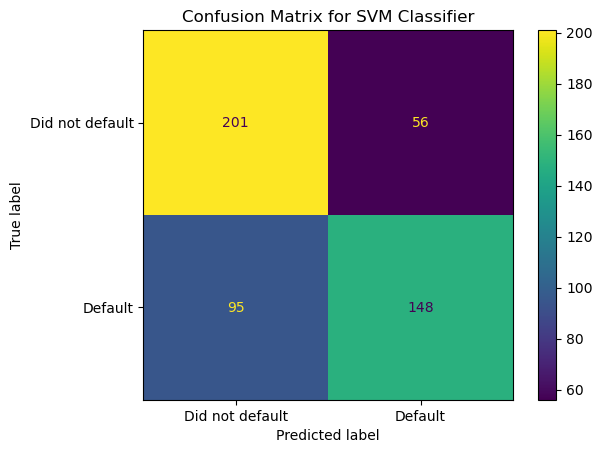

In [166]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf_svm, 
    X_test_scaled, 
    Y_test, 
    display_labels=["Did not default", "Default"], 
    values_format='d'  # Display confusion matrix counts as integers
)

# Show the plot
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

In the confusion matrix, we see that of the 257 people that did not default , 201(79%), were correctly classified. And of the 243 people that defaulted, 148(61%) were correctly classified. So the SVM was not awesome. So let's try to improve the predictions using Cross Validation to optimize the parameters.

# Optimize Parameters with Cross Validation and GridSearchCV()

Optimimzing a SVM is all about finding the best value of gamma, and potentially, the regularization parameter, C. So let's see if we can find better parameter values using Cross Validation in hope that we can improve the accuracy with the Testing Dataset.

Since we have two parameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for gamma and C, and GrisdSearchCV() tests all possible combinations of the parameters for us.

In [170]:
param_grid=[
    {'C':[0.5,1,10,100], # Note: Values of C must be >0
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
    }]

    ## NOTE : We are including  C=1 and gamma='scale'
    ## as possible choices since they are the default values.abs

optimal_params=GridSearchCV(
                SVC(),
                param_grid,
                cv=5, # number of times we want to do cross validation
                scoring='accuracy', ## (accuracy is default scoring) Slightly improved but hardly !!! C=1, gamma='0.1
                #Scoring = 'balanced accuracy' ## Slightly improved bt hardly !!!, C=1, gamma=0.01
                #Scoring ='f1', ## Terible!!!,C=0.5,gamma=1
                #Scoring ='f1_micro' ##Slightly improved but hardly!!, C=1,gamma=0.01
                #Scoring ='f1_macro'## Same!! C=1, gamma='scale', these are the default values.
                #Scoring ='f1_weighted' ## Same !! C=1, gamma='scale', these are the default values
                #Scoring ='roc_auc', ## Terrible !!! C=1, gamma=0.001
                ## For more scoring metrics see:
                ##scikit-learn.org/stable/modules/model_evaluation.html#scoring parameter
                verbose=0 # NOTE: If you want to see what Grid Search is doing,set verbose=2
)

optimal_params.fit(X_trained_scaled, Y_train)
print(optimal_params.best_params_)


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


We got the optimal parameters !!!

# Building, Evaluating, Drawing and Interpreting the Final SVM


In [171]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_trained_scaled,Y_train)

SVC(C=100, gamma=0.001, random_state=42)

Now lets draw another confusion matrix to check if this time out SVM works correctly or not.

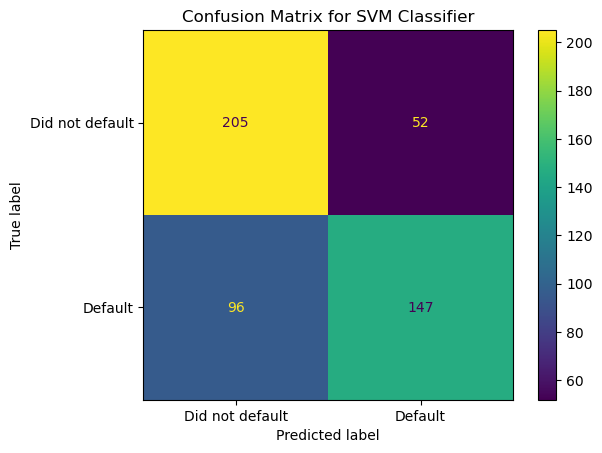

In [172]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf_svm, 
    X_test_scaled, 
    Y_test, 
    display_labels=["Did not default", "Default"], 
    values_format='d'  # Display confusion matrix counts as integers
)

# Show the plot
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

And the results from the optimized SVM are just a little bit better than before, $ more people were correctly classified as not defaulting and only 1 more person was incorrectly classified as defaulting.


In other words, the SVM was pretty good straight out of the box without much optimization. This makes SVMs a great quick and dirty method for relatively small datasets.

NOTE: Although classification with this dataset and an SVM is not awesome, it may be better than other methods. We'd have to compare to find out.

The last thing we need to do is draw a support vector machine decision boundary and interpret it.

First, counting the number of columns in X:


In [173]:
len(df_downsample.columns)

24

So we see that there are 24 features, or columns in X. This is a problem because it would require a 24-dimensional graph, one dimension per feature used to make predictions, to plot it data in raw form. If we wanted we could just pick two features at random to use as x and y-axes on our graph, but instead, we will use PCA (Principal Component Analysis) to combine the 24 features into 2 orthogonal meta-features that we can use as axes for a graph. 

However, before we shrink the graph, let's first determine how accurate the shrunken graph will be. If it's relatively accurate, then it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be useful. We can determine the accuracy of the graph by drawing something called a scree plot.



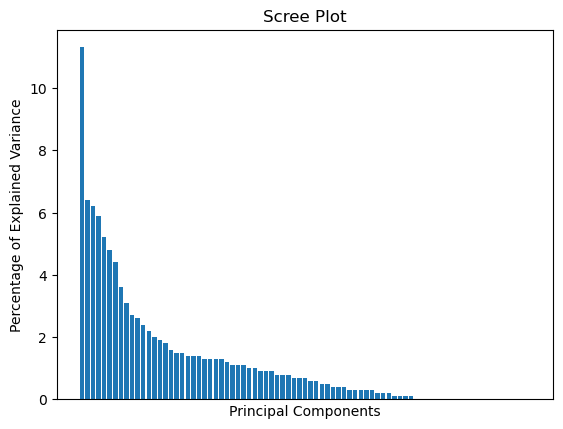

In [175]:
pca=PCA() # Note: by default, PCA() centers the data, but does not scale it.
X_train_pca=pca.fit_transform(X_trained_scaled)

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=[str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(
    axis='x',           # chnages apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=False,       # ticks along the bottom edge are off
    top=False,          # ticks along the top edge are off
    labelbottom=False   #labels along the bottom edge are off
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension reduction. Since we don't have a choice, let's go with it but the graph would look funky most probably.


Now we will draw the PCA graph. NOTE: This code is quite technical, but we don't have to type it in and there are comments that explain each step. First let's optimize an SVM fit to PC1 and PC2.

In [177]:
train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

## NOTE:
## pc1 conatins the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

# Now center and scale the PCs...abs
pca_train_scaled=scale(np.column_stack((train_pc1_coords,train_pc2_coords)))

# Now we optimize the SVM to fit to the x and y-axis coordinates
## of the data after PCA dimension reduction ...
param_grid=[
    {'C':[1,10,100,1000],
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf'],
    }
]

optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_train_scaled,Y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


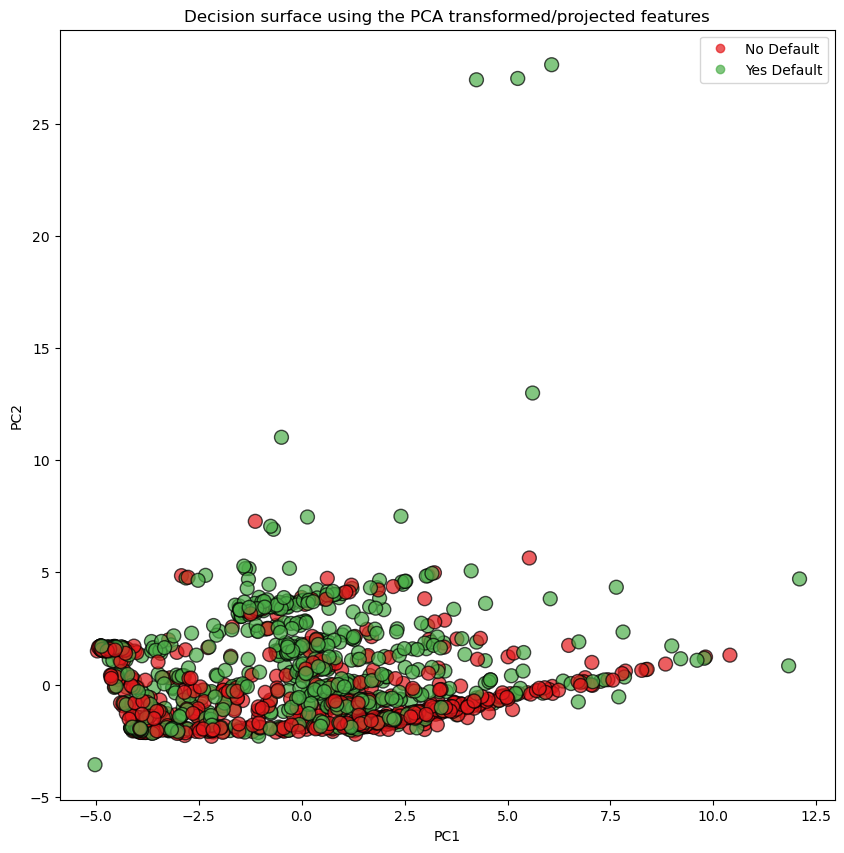

In [188]:
clf_svm=SVC(random_state=42,C=42,gamma=0.001)
clf_svm.fit(pca_train_scaled,Y_train)

## Transform the test dataset with PCA
X_test_pca=pca.transform(X_trained_scaled)
#X_test_pca=pca.transform(X_test_scaled)

test_pc1_coords=X_test_pca[:,0]
test_pc2_coords=X_test_pca[:,1]

## Now create a matrix of points that we can use to show 
## the decision regions
## The matrix will be a little bit larger than the 
## transformed PCA points so that we can plot all of 
## the PCA points on it without them being on the edge

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx,yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))

## Now we will classify every point in that
# ## matrix with the SVM. Points on one side of the
# ## classification boundary will get 0, and points on the other
# ## side will get 1

Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds 
## to a specific point in the matrix.
Z=Z.reshape(xx.shape)

fig,ax=plt.subplots(figsize=(10,10))
 ## now create custom colors for actual datapoints
cmap=colors.ListedColormap(['#e41a1c','#4daf4a'])
 ##now draw the actual data points - these will
 ## be colored by their know(not predicted) classifications
 ## NOTE: setting alpha=0.1 Lets us see if we are covering up a point
 # scatter = ax.scatter(test_pc1_coords,test_pc2_coords,c=y_test,)
scatter = ax.scatter(test_pc1_coords, test_pc2_coords,c=Y_train,
                    cmap=cmap,
                    s=100,
                    edgecolors='k', ## k =black
                    alpha=0.7
                    ) 
## now create a legend
legend = ax.legend(scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc='upper right'
                    )
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')
#plt.savefig('svm.default.png')
plt.show()

               